### MNIST Digit Dataset

##### Student comment for below code: <br> 
load_digits dataset is loaded from sklearn. Then pandas library added and dataFrame created with the loaded dataset.

In [1]:
from sklearn.datasets import load_digits

data = load_digits()

In [2]:
import pandas as pd

df = pd.DataFrame(data.data, columns=[data.feature_names])
df['target'] = data.target.astype(int)

##### Student comment for below code: <br> 
describe() function is used to view some basic statistical details like count, mean, std etc. for our load_digits dataset.

In [3]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


##### Student comment for below code: <br> 
Plot each image on dataset with gray color.

<Figure size 432x288 with 0 Axes>

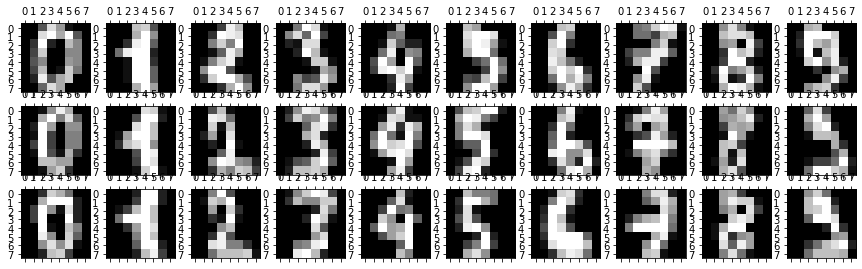

In [4]:
import matplotlib.pyplot as plt # Plotting
%matplotlib inline

plt.gray()
plt.figure(figsize=(15, 15))
for i in range(30):
    plt.subplot(10, 10, i+1).matshow(data.images[i])

##### Student comment for below code: <br> 
X is our sample data and y is our labels. 

In [5]:
X = data.data
y = data.target

print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


##### Student comment for below code: <br> 
np.unique() is used to return array of labels sorted and unique. Then digits hold this array.

In [6]:
import numpy as np

digits = np.unique(y)
print(digits)

[0 1 2 3 4 5 6 7 8 9]


##### Student comment for below code: <br> 
Below code count all unique labels and frequency of each label is stored in frequencies.

In [7]:
frequencies = pd.Series(y).value_counts().sort_index()
print(frequencies)

0    178
1    182
2    177
3    183
4    181
5    182
6    181
7    179
8    174
9    180
dtype: int64


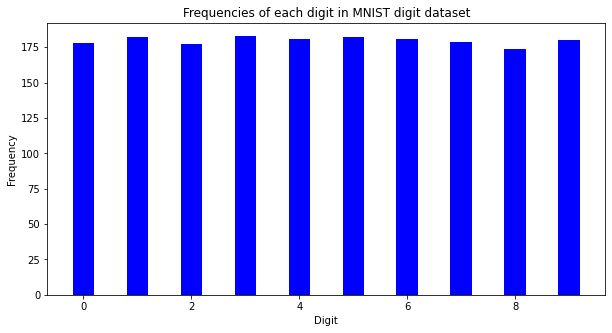

In [8]:
fig = plt.figure(figsize = (10, 5))

plt.bar(digits, frequencies, color ='blue', width = 0.4)
plt.xlabel("Digit")
plt.ylabel("Frequency")
plt.title("Frequencies of each digit in MNIST digit dataset")
plt.show()

### Experiments on Digits using PCA

##### Student comment for below code: <br> 
Take mean of each X raws and plot this 8 by 8 image.

Text(0.5, 1.0, 'Average of all digits')

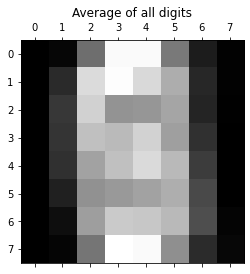

In [9]:
plt.matshow(np.mean(X, axis=0).reshape((8, 8))) 
plt.title('Average of all digits')

Average of all digits is useless.

##### Student comment for below code: <br> 
Import PCA library and fit our sample data (X) with PCA algorithm.

In [10]:
from sklearn.decomposition import PCA

pca = PCA()
scores = pca.fit_transform(X)  

##### Student comment for below code: <br> 
One aim of the PCA is reducing dimensions. It should be estimated how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components. Plot the graph for Number of Components vs Cumulative Explained Variance.

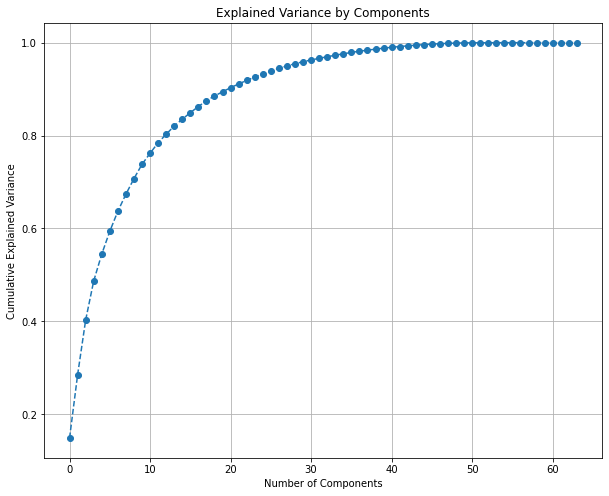

In [11]:
plt.figure(figsize = (10, 8))
plt.plot(pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--') 
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid() 

### Experiments on each Digits using PCA

##### Student comment for below code: <br> 
Loop over each element in digits which are numbers from 0 to 9. For each digit, 
<ol><li> Create matrix Xd equals to combination of all features (eigenvectors) with related to selected digit, </li>
<li> Calculate meanDigit for averaging all digit with using Xd matrix,</li>
<li> Plot averaged digits with size 8 by 8,</li>
<li> Add meanDigit to meanDigits array,</li>
<li> Fit the model with Xd and apply the dimensionality reduction on Xd,</li>
<li> Add dimension reducted Xd to digitPCAs array.</li></ol>

<Figure size 432x288 with 0 Axes>

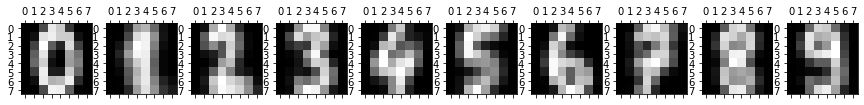

In [12]:
meanDigits = []
digitPCAs = [] 

plt.gray()
plt.figure(figsize=(15, 15))
for index in digits:
    indices = (y == index)
    Xd = data.data[indices]
    
    meanDigit = np.mean(Xd, axis=0) 
    plt.subplot(1, 10, index+1).matshow(meanDigit.reshape((8, 8)))  
    meanDigits.append(meanDigit)    
    
    pca = PCA()
    scores = pca.fit_transform(Xd)  
    digitPCAs.append(pca)

##### Student comment for below code: <br> 
As mentioned before, one aim of the PCA is reducing dimensions. It should be estimated how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components. <br>
Loop over each element in digits which are numbers from 0 to 9. For each digit, plot the graph for Number of Components vs Cumulative Explained Variance.

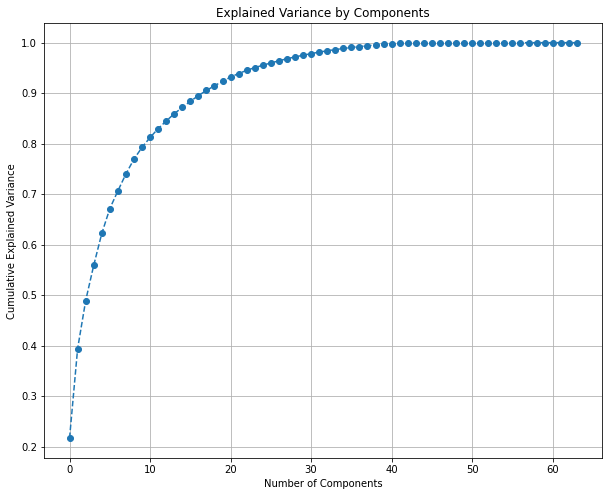

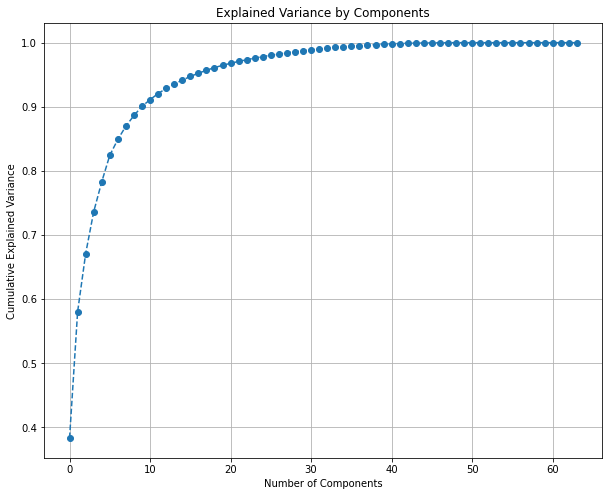

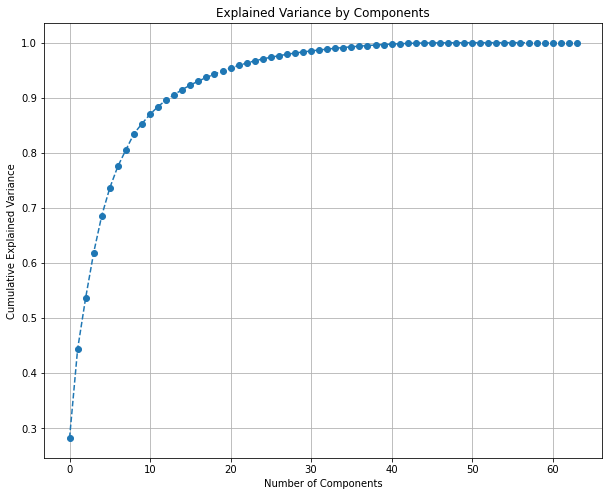

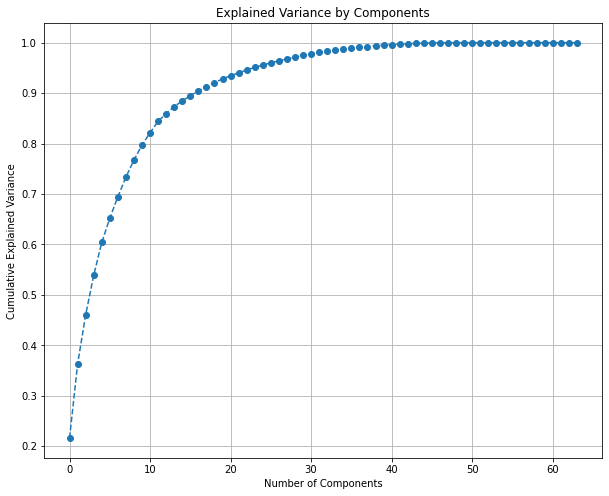

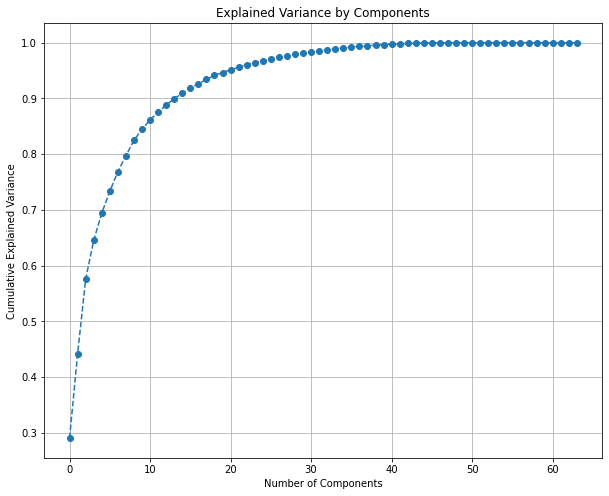

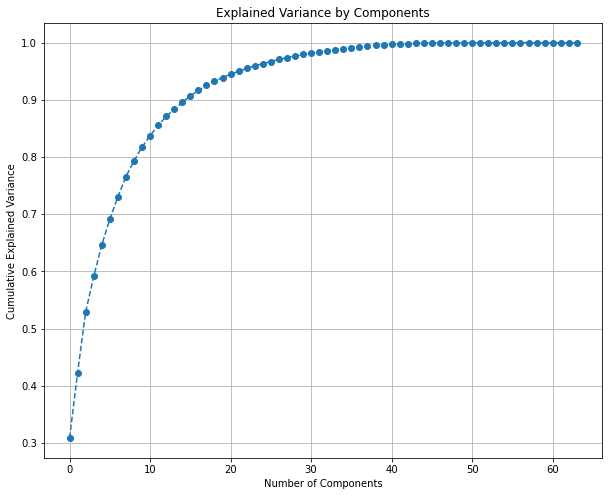

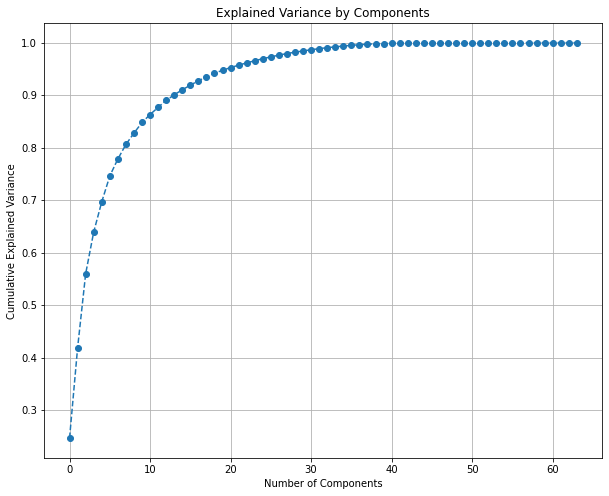

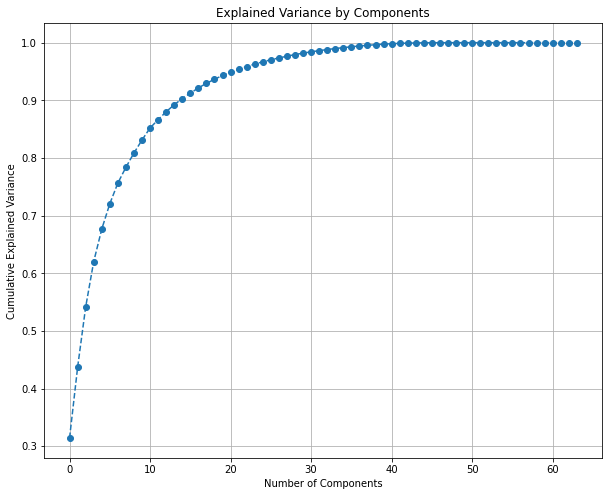

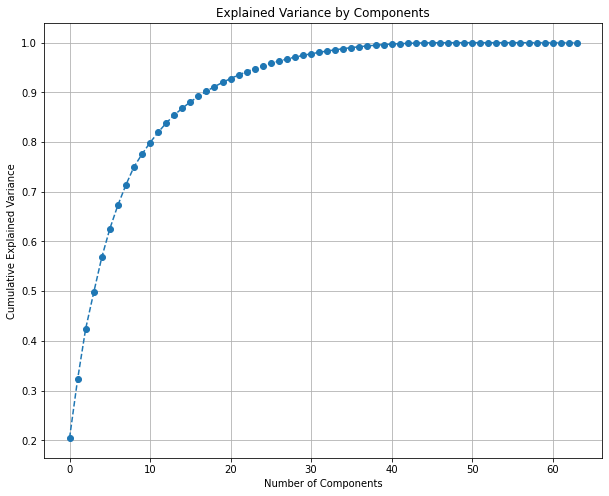

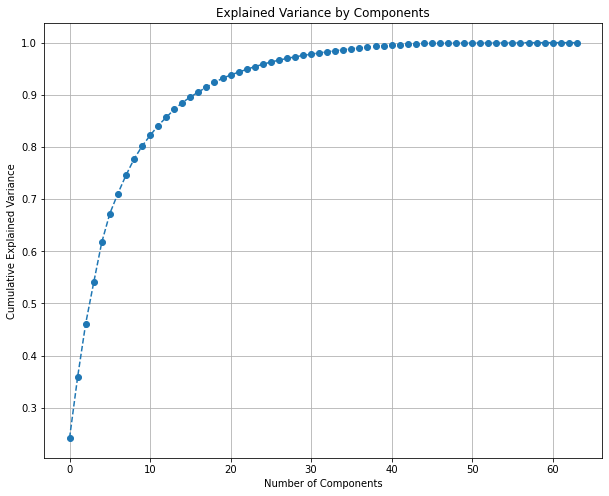

In [13]:
for index in digits:
    pca = digitPCAs[index]
    
    plt.figure(figsize = (10, 8))
    plt.plot(pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--') 
    plt.title('Explained Variance by Components')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid()  

Let take only first 16 components over 64 components (eigenvectors), i.e. reduced to %25 of the original storage while only 10% information is lost

##### Student comment for below code: <br> 
When above graphs examined, only first 16 components over 64 components (eigenvectors) selected. Loop over each digit in digits which are numbers from 0 to 9. For each digit, hold each first 16 eigenvectors in components variable, plot each mean digit (stored in meanDigits) and also plot selected first 16 images with size 8 by 8.

<Figure size 432x288 with 0 Axes>

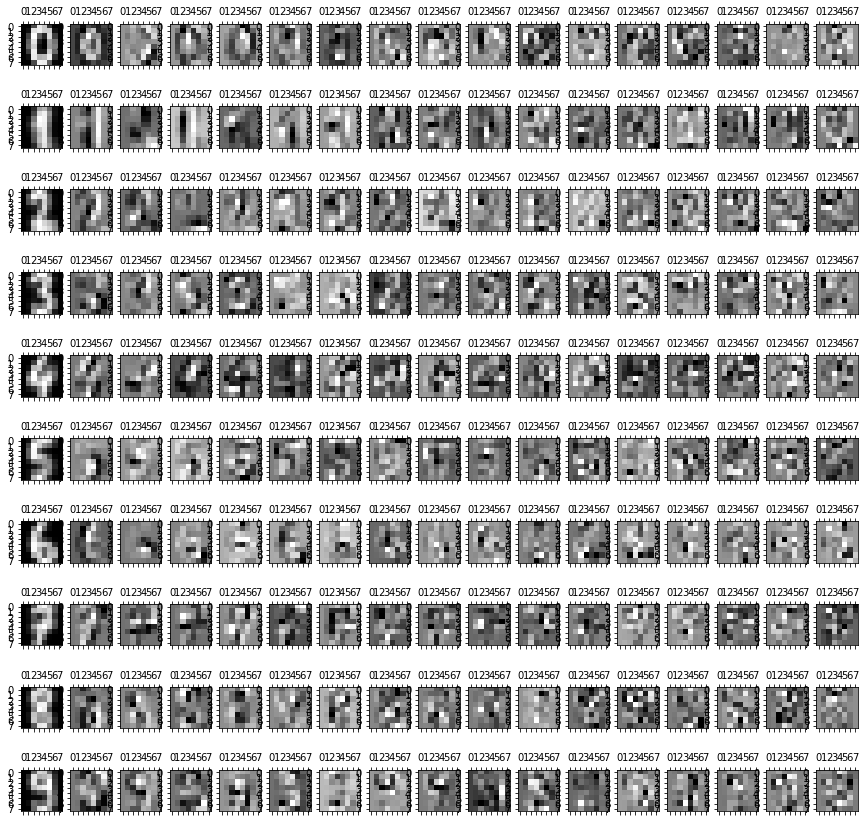

In [14]:
rank = 16

i = 1
plt.gray()
plt.figure(figsize=(15, 15))
for index in digits:
    pca = digitPCAs[index]
    components = pca.components_[0:rank, :]
    
    # mean digit
    meanDigit = meanDigits[index]
    plt.subplot(digits.size, rank+1, i).matshow(meanDigit.reshape((8, 8))) 
    i = i + 1
    
    # first 16 eigenvectors (reshaped from vector of 64 to 8x8 to show as an image)
    for r in range(0, rank):
        plt.subplot(digits.size, rank+1, i).matshow(components[r, :].reshape((8, 8))) 
        i = i + 1
   

##### Student comment for below code: <br> 
Loop over each digit in digits which are numbers from 0 to 9. For each digit,

<Figure size 432x288 with 0 Axes>

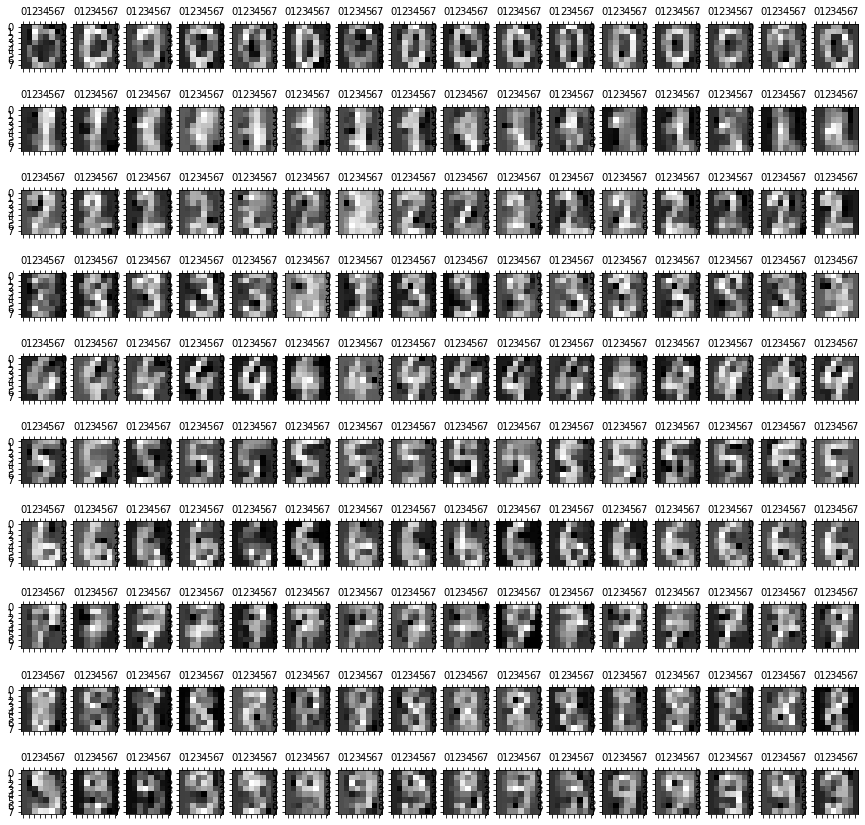

In [15]:
i = 1    
plt.gray()
plt.figure(figsize=(15, 15))    
for digit in digits:
    meanDigit = meanDigits[digit]
    pca = digitPCAs[digit]
    components = pca.components_[0:rank, :]

    sv = pca.singular_values_[0:rank]
    
    for rk in range(0, rank):
        rg = np.random.normal(0, 1, size=(rank, 1))
        randomDigit = meanDigit;
        for r in range(0, rank): 
            randomDigit = randomDigit + rg[r]*np.sqrt(sv[r])*components[r, :]   

        plt.subplot(digits.size, rank, i).matshow(randomDigit.reshape((8, 8))) 
        i = i + 1

### Questions

##### Q1) We trained PCA for whole dataset and we also trained 10 PCA (one for each digit class). Compare the difference of these two approaches by looking at the Variance Explained plots : <br> 
A1) For whole dataset, when we select first 16 components, we lost %13 information. But in one for each digit class we select first 16 components, we lost %10 information. In other words, we lost more information in whole dataset approach. Because we averaged all digits and some of the seperated values in vectors are lost.

##### Q2) Using the trained 10 PCA, propose a digit classification approach for a given input digit image : <br> 
A2) Given input digit image is multiclass data. We can use OVO with SVM.

##### Q3) Using the trained 10 PCA, propose a denoising approach such that noise is reduced from given noisy digit input image (assume that you can determine the digit class of the given input digit image using the solution you proposed in the Question 2) : <br> 
A3) We can use SVM for reducing noise. With SVM we can select best C with bias-varince tradeof for reducing necessary noises.